<h2>(Multivariate) Linear Regression</h2>

<b>Outline</b><br/>
<ul>
    <li>Introduction</li>
    <li>Simple linear regression</li>
    <li>Multiple linear regression</li>
    <li>Benchmarking Criteria</li>
    <li>Multiple linear regression - case study</li>
    <li>Exploratory data analysis - Correlation analysis</li>
    <li>Additional reading: MLR with hypothesis testing</li>
    <li>Categorical variable encoding</li>
    </ul>


<h3>1. Introduction </h3><br/>
Linear regression is a simple regression algorithm that assumes the existence of a linear relationship between the depedent variable and a set of indepedent variables.

$$
 y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + ...+\theta_nx_n + \epsilon
$$

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #ignore warnings

df = pd.read_csv('https://raw.githubusercontent.com/mlinsights/freemium/main/datasets/regression-analysis/milk_price_market_survey.csv')
df.head()

,gram,price
0,1350.0,180.0
1,1400.0,176.0
2,1250.0,140.0
3,750.0,93.0
4,900.0,135.0


<h3>2. Simple linear regression</h3>

$$
y = \theta_0 + \theta_1x
$$

Text(0.5, 1.0, 'Milk Pricing Survey Data')

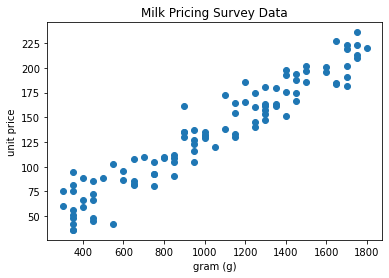

In [148]:
plt.figure() #plotting the data
plt.scatter(df['gram'],df['price'])
plt.xlabel('gram (g)')
plt.ylabel('unit price')
plt.title('Milk Pricing Survey Data')

In [149]:
from sklearn.linear_model import LinearRegression
import numpy as np

lm = LinearRegression()

X = df[['gram']]
y = df[['price']]

lm.fit(X,y) #fit model (training the model -> applies the gradient descent method)

y_predict = lm.predict(X)#get model prediction of observation

price_model = "p(g) = %.3fg + %.3f"%(lm.coef_[0],lm.intercept_)
print(price_model)

p(g) = 0.111g + 19.861


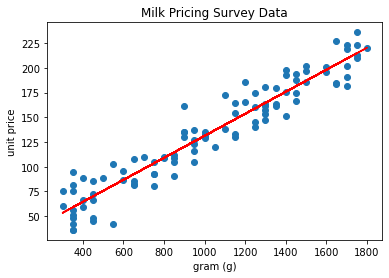

In [150]:
import matplotlib.pyplot as plt

y_pred = lm.predict(df[['gram']])

plt.figure()
plt.scatter(df['gram'],df['price'])
plt.plot(df['gram'],y_pred,color="r")
plt.xlabel('gram (g)')
plt.ylabel('unit price')
plt.title('Milk Pricing Survey Data')
plt.show()

In [151]:
import numpy as np

gram = 850
data_input = np.array([gram]).reshape(1,-1)

price_estimate = lm.predict(data_input)
print(f'Price of a {gram} gram milk can: R{price_estimate[0][0]}')

Price of a 850 gram milk can: R114.51740471142871


<h2>3. Multivariate Linear Regression</h2>

<b>1. Model formulation<b/>:
$$
 y = f(\theta,x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + ...+\theta_nx_n , f \text{ is a linear model.}
$$
    
$$
     y =  \theta_0 + \sum_{i=1}^{n}\theta_ix_i
$$
    

    
<b>2. Model building <b/><br/>

Typically, A MLR model is trained using the <b>least-square method</b>, such regression model is called an OLS regression model. (other method: Maximum Likelihood method - MLL)
    
    
<b>Strategy</b>: "Find the model parameters that will <b>minimise</b> the sum of square errors (SSE)". <br/><br/>The SSE is the difference between the model prediction and the actual observed target values across all datapoints.
    
$$
    SSE(\theta) = \sum_{i=1}^{N_d}(y_i-f(\theta,x_i))^2
$$
    
$$
    SSE(\theta) = \sum_{i=1}^{N_d}(y_i-\theta_0-\theta_1x_{1i}-\theta_1x_{2i}-...-\theta_nx_{ni})^2
$$

    
<b>Optimisation problem</b>: minimise $SSE(\theta)$
    
    

Two solution methods exist: 
    <ul>
    <li>Closed-form solution: Matrix manipulation - for small datasets</li>
    <li>Iterative Numerical optimisation: Use the gradient descent algorithm or variants for large datasets</li>
    </ul>

<h3>4. Benchmarking criteria</h3><br/>
To assess the goodness of fit of a regression model, two numerical metrics are used: 

<ul>
    <li>Mean Square error $MSE$, The Root mean Square $RMSE$</li>
    <li>The $R^2$ coefficient of determination</li>        
</ul>
     
1. The mean square error is computed as follows:  

$$
MSE = \frac{1}{n}SSE_{reg} =\frac{1}{n}\sum_{i=1}^{n}(y_i-y_{p_i})^2
$$
     
2. The $R^2$ coefficient of determination is used:

$$
 R^2 = 1 - \frac{SSE_{reg}}{SSE_{tot}}
$$

$$
 SSE_{reg} = \sum_{i=1}^{n}(y_i-y_{p_i})^2
$$

$$
 SSE_{tot} = \sum_{i=1}^{n}(y_i-\bar{y})^2
$$


$$-\infty < 0 <  R^2 \leq 1$$

Graphically, the <b>goodness of fit</b> scatter plot is used that compares the observed data (x-axis) against the model prediction (y-axis).

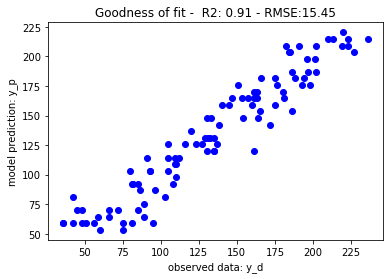

In [152]:
from sklearn import metrics
import math

r2_score_m = metrics.r2_score(y,y_predict)
mean_score_m = metrics.mean_squared_error(y,y_predict)

plt.figure()
plt.scatter(y, y_predict, color="b")
plt.xlabel('observed data: y_d')
plt.ylabel('model prediction: y_p')
plt.title('Goodness of fit -  R2: %.2f - RMSE:%.2f'%(r2_score_m,math.sqrt(mean_score_m)))
plt.show()

<h3>5. Case-studies</h3>

<b>Case-study 1</b>: House pricing problem: Design a house valuation model for houses in a given town

In [153]:
r_df = pd.read_csv('https://raw.githubusercontent.com/mlinsights/freemium/main/datasets/regression-analysis/real-estate-house-pricing/real_estate_data.csv')
r_df = r_df.iloc[:,1:] #retrieve house pricing data
r_df.head()

,house_age,dist_nStation,num_cStores,dist_nStation.1,lat,long,house_p
0,32.0,84.87882,10,84.87882,24.98298,121.54024,3221.5
1,19.5,306.59470,9,306.59470,24.98034,121.53951,3587.0
2,13.3,561.98450,5,561.98450,24.98746,121.54391,4020.5
3,13.3,561.98450,5,561.98450,24.98746,121.54391,4658.0
4,5.0,390.56840,5,390.56840,24.97937,121.54245,3663.5


<h4> Step 1: Identify the features and the target</h4>


In [154]:
X = r_df.iloc[:,[0,1,2,4,5]] #features
y = r_df.iloc[:,[6]] #target

X.head()

,house_age,dist_nStation,num_cStores,lat,long
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [155]:
y.head()

,house_p
0,3221.5
1,3587.0
2,4020.5
3,4658.0
4,3663.5


<h4>Step 2: Split the data into training and test set: 80/20  or 70/30</h4>

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)#fix the random seed (to reproduce the results)

<h4>Step 3: Build the Regression model</h4>

In [157]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train,y_train) #train the model

y_predict_train = mlr.predict(X_train)
y_predict_test = mlr.predict(X_test)

In [167]:
mlr.coef_

array([[-1.82430344e+01, -3.36759601e-01,  1.05859232e+02,
         1.93450651e+04,  2.40973646e+03]])

In [169]:
mlr.intercept_

array([-772411.99642972])

In [170]:
coef_df = pd.DataFrame({'coefs':mlr.coef_[0]})
coef_df.head()

,coefs
0,-18.243034
1,-0.336760
2,105.859232
3,19345.065091
4,2409.736455


<h4>Step 4: Testing the model performance</h4>

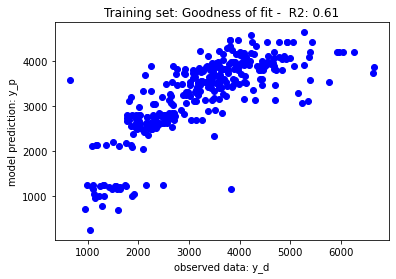

In [158]:
r2_score_train = metrics.r2_score(y_train,y_predict_train)

plt.figure()
plt.scatter(y_train, y_predict_train, color="b")
plt.xlabel('observed data: y_d')
plt.ylabel('model prediction: y_p')
plt.title('Training set: Goodness of fit -  R2: %.2f'%(r2_score_train))
plt.show()

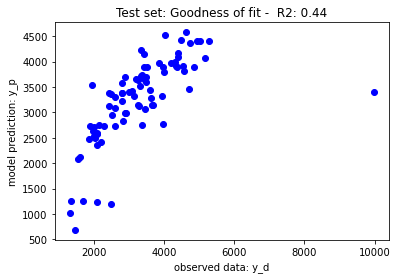

In [159]:
r2_score_test = metrics.r2_score(y_test,y_predict_test)

plt.figure()
plt.scatter(y_test, y_predict_test, color="b")
plt.xlabel('observed data: y_d')
plt.ylabel('model prediction: y_p')
plt.title('Test set: Goodness of fit -  R2: %.2f'%(r2_score_test))
plt.show()

<h3>6. Colinearity analysis - Exploratory Data analysis</h3>


<b>6.1 Pairplot</b>

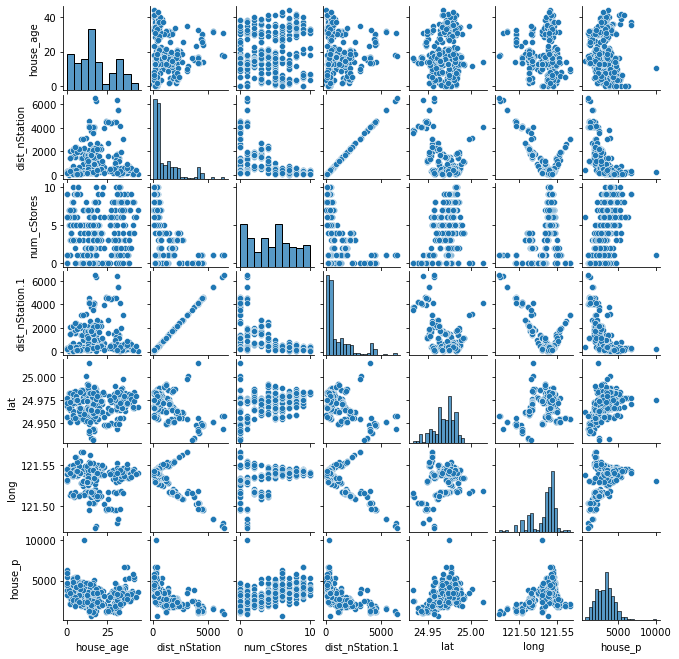

In [160]:
from seaborn import pairplot
g = pairplot(r_df)
g.fig.set_size_inches(9,9)

<b>6.2 Correlation matrix</b>

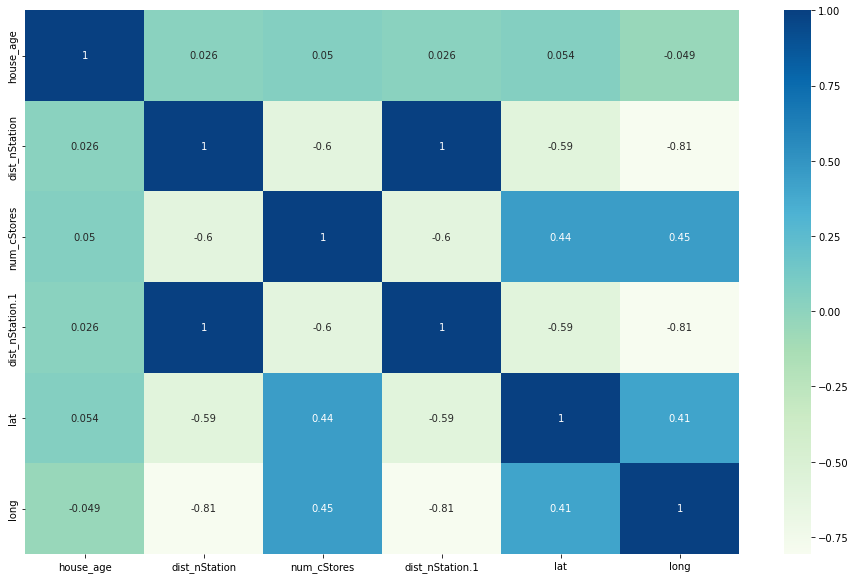

In [161]:
import seaborn as sns

plt.figure(figsize = (16,10))
sns.heatmap(r_df.drop('house_p',axis='columns').corr(), annot = True , cmap="GnBu")
plt.show()

<h3>7. Additional Research work - MLR with hypothesis testing</h3>

$$
 y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + ...+\theta_nx_n + \epsilon
$$

When linear regression fulfills certain conditions:
<ul>
    <li> $\epsilon \approx N(0,\sigma^2)$, the residual error is normally distributed</li>
    <li> Dependent variables are independent from each other (i.e. no colinearity)</li> 
    <li>Independence of observation error </li>
    <li>and more</li>
   </ul>
Statistical inference can be incorporated into the analysis.
<ul>
    <li> <b>F-test</b> : Verify whether the model has explanatory power or not (i.e. relevance of the model)
    </li> 
    <li><b>t-test</b>: Verify wether a variable is relevant to the model or not</li>
    <li>Confidence of the output variable</li>
    <li>etc.</li>    
</ul>

<h3>8. Pros and Cons of MLR</h3>

Benefits:

<ul>
    <li>Simple and Computationally efficient</li>
    <li>Easy to interpret</li>
</ul>

Limits:

<ul>
    <li> Performs poorly in nonlinear datasets</li>
    <li>Linear regression is sensitive to ouliers and influential points</li>
    <li>Sensitive to correlated predictor variables</li>
</ul>

<h3>9. Additional Case-study</h3>

Case-study: Analyse the existing relationship between temperature and other factors of weather.

Dataset: https://www.kaggle.com/code/piyushmittal12/weather-case-study-multiple-linear-regression/input

Example-solution (look at it after trying your own solution):
https://www.kaggle.com/code/piyushmittal12/weather-case-study-multiple-linear-regression/notebook


<h4>10. Categorical variables in MLR</h4><br/>
Can we use categorical variables in multiple linear regression? Yes. However, these variables need to be converted to numerical variables using

<ul>
    <li> One hot-encoding: creating a set of binary variables
    </li>
    <li>
        Ordinal encoding: creating an order numeric variable
    </li>
    <li>
        Label encoding: creating a numeric variable with no order component
    </li>
    </ul>

In [171]:

t_df = pd.DataFrame({'id':[123,451,32,34,564,797],'size':['small','medium','large','small','large','large']})
t_df.head()

,id,size
0,123,small
1,451,medium
2,32,large
3,34,small
4,564,large


<b>One Hot Encoding</b>: Converting to binary outcomes

In [163]:
new_vars = pd.get_dummies(t_df[['size']])
new_vars.head()

,size_large,size_medium,size_small
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0


In [164]:
#t_df_sm = t_df.drop('size',axis='columns')
t_df = pd.concat([t_df,new_vars],axis=1)
t_df.head()

,id,size,size_large,size_medium,size_small
0,123,small,0,0,1
1,451,medium,0,1,0
2,32,large,1,0,0
3,34,small,0,0,1
4,564,large,1,0,0


<b>Ordinal Encoding</b>

In [165]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories=[['small','medium','large']])

t_df['size_ord_enc'] = ord_enc.fit_transform(t_df[['size']])
t_df.head()

,id,size,size_large,size_medium,size_small,size_ord_enc
0,123,small,0,0,1,0.0
1,451,medium,0,1,0,1.0
2,32,large,1,0,0,2.0
3,34,small,0,0,1,0.0
4,564,large,1,0,0,2.0


<b>Label Encoding</b>

In [166]:
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()

t_df['size_label_enc'] = lbl_enc.fit_transform(t_df[['size']])
t_df.head()

,id,size,size_large,size_medium,size_small,size_ord_enc,size_label_enc
0,123,small,0,0,1,0.0,2
1,451,medium,0,1,0,1.0,1
2,32,large,1,0,0,2.0,0
3,34,small,0,0,1,0.0,2
4,564,large,1,0,0,2.0,0
